# Projet - Python data analysis
## James-Martin TA
------
##### Dataset : https://archive.ics.uci.edu/ml/datasets/PPG-DaLiA
##### Powerpoint : https://docs.google.com/presentation/d/12uKmVTlqOBKLXtzijHuYCdbmOtQ-_gnjroWiHlmZwfM/edit?usp=sharing
------


# DATA VIZUALISATION
----
Data-visualisation (utilisez matplotlib, searborn, bokeh…) – montrez le lien entre les variables et la cible : 20%

# Import des Data

In [0]:
url_csv = "https://gitlab.com/james-martin.ta/activity-predition-from-ppg-dalia/raw/master/data/fullData.csv"

In [0]:
import pandas as pd
df = pd.read_csv(url_csv)
df.head()

Unnamed: 0 Subject  Activity  ChestAccChannel1  ...  Height  Skin  Sport  Weight
0           0      S2       0.0            0.9162  ...   189.0     3      5    80.0
1           1      S2       0.0            0.9130  ...   189.0     3      5    80.0
2           2      S2       0.0            0.9138  ...   189.0     3      5    80.0
3           3      S2       0.0            0.9080  ...   189.0     3      5    80.0
4           4      S2       0.0            0.9146  ...   189.0     3      5    80.0

[5 rows x 21 columns]

# Data Vizualisation

In [0]:
x = df.copy()

In [0]:
x["Subject"].unique()

array(['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S1'], dtype=object)

## Sujets et âges

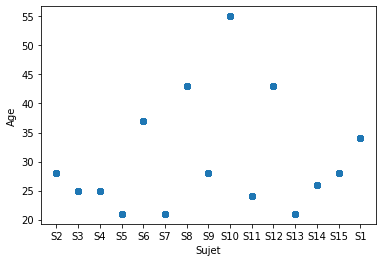

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x["Subject"], x["Age"])
plt.ylabel('Age')
plt.xlabel("Sujet")
plt.show()

On a des sujet de tout âge

## Répartition des tailles des sujets 

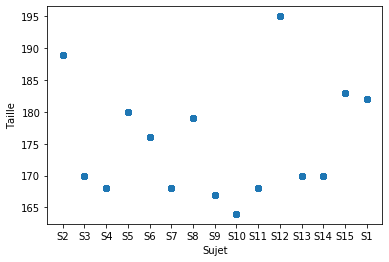

In [0]:
plt.scatter(x["Subject"], x["Height"])
plt.ylabel('Taille')
plt.xlabel("Sujet")
plt.show()

Egalement, des sujet de toutes tailles

## Target activity avec les sujets 

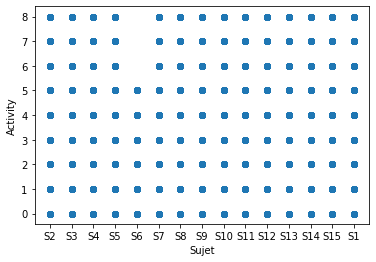

In [0]:
plt.scatter(x["Subject"], x["Activity"])
plt.ylabel('Activity')
plt.xlabel("Sujet")
plt.show()

L'acquisition du dataset s'est faite avec les sujets qui ont exécutés toutes les activités sauf le patient S6

## Influence des indices cardiaques sur l'activity target 


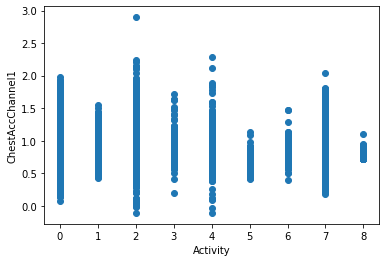

In [33]:
from pylab import *

#x1 = x['Activity'].loc[x["Subject"] == "S1"]
#y1 = x['ChestAccChannel1'].loc[x["Subject"] == "S1"]
#y2 = x["ChestAccChannel2"]
#y3 = x["ChestAccChannel3"]
#plot(y1, x1)
#plot(x1, y2)
#plot(x1, y3)

#show()

# Pour le Sujet 1, on analyse ChestAccChannel1
plt.scatter(x['Activity'].loc[x["Subject"] == "S1"], x['ChestAccChannel1'].loc[x["Subject"] == "S1"])
plt.xlabel('Activity')
plt.ylabel("ChestAccChannel1")
plt.show()

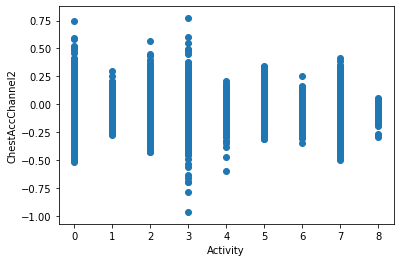

In [32]:
# Pour le Sujet 1, on analyse ChestAccChannel2
plt.scatter(x['Activity'].loc[x["Subject"] == "S1"], x['ChestAccChannel2'].loc[x["Subject"] == "S1"])
plt.xlabel('Activity')
plt.ylabel("ChestAccChannel2")
plt.show()

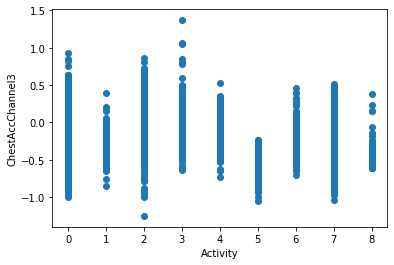

In [34]:
# Pour le Sujet 1, on analyse ChestAccChannel3
plt.scatter(x['Activity'].loc[x["Subject"] == "S1"], x['ChestAccChannel3'].loc[x["Subject"] == "S1"])
plt.xlabel('Activity')
plt.ylabel("ChestAccChannel3")
plt.show()

## Même chose avec une moyenne des 3 signaux

   Unnamed: 0 Subject  Activity  ...  Sport  Weight  meanChestACC
0           0      S2       0.0  ...      5    80.0       -0.0040
1           1      S2       0.0  ...      5    80.0        0.0401
2           2      S2       0.0  ...      5    80.0        0.0460
3           3      S2       0.0  ...      5    80.0        0.0508
4           4      S2       0.0  ...      5    80.0        0.0606

[5 rows x 22 columns]


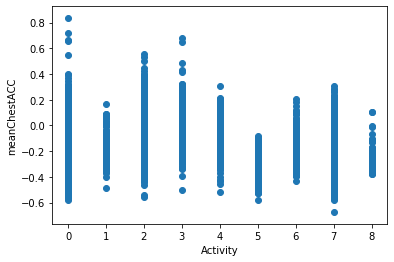

In [48]:
col = x.loc[: , "ChestAccChannel2":"ChestAccChannel3"]

x["meanChestACC"] = col.mean(axis=1)

print(x.head())
# Pour le Sujet 1, on analyse ChestAccChannels, les 3 en moyenne
plt.scatter(x['Activity'].loc[x["Subject"] == "S1"], x['meanChestACC'].loc[x["Subject"] == "S1"])
plt.xlabel('Activity')
plt.ylabel("meanChestACC")
plt.show()


Le Chest ACC ne semble pas influencer sur l'activity, je ne vois pas de corrélation

## Analyse du label

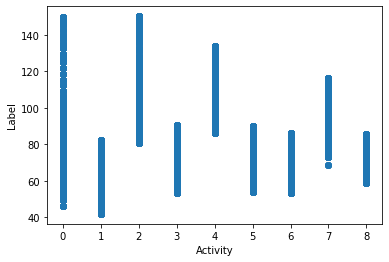

In [51]:
plt.scatter(x['Activity'].loc[x["Subject"] == "S1"], x['Label'].loc[x["Subject"] == "S1"])
plt.xlabel('Activity')
plt.ylabel("Label")
plt.show()

## Matrix correlation entre les data 

In [62]:
import seaborn as sn

x.drop(['meanChestACC'], axis=1)

Unnamed: 0 Subject  Activity  ...  Skin  Sport  Weight
0                0      S2       0.0  ...     3      5    80.0
1                1      S2       0.0  ...     3      5    80.0
2                2      S2       0.0  ...     3      5    80.0
3                3      S2       0.0  ...     3      5    80.0
4                4      S2       0.0  ...     3      5    80.0
...            ...     ...       ...  ...   ...    ...     ...
517951       36843      S1       0.0  ...     3      6    78.0
517952       36844      S1       0.0  ...     3      6    78.0
517953       36845      S1       0.0  ...     3      6    78.0
517954       36846      S1       0.0  ...     3      6    78.0
517955       36847      S1       0.0  ...     3      6    78.0

[517956 rows x 21 columns]

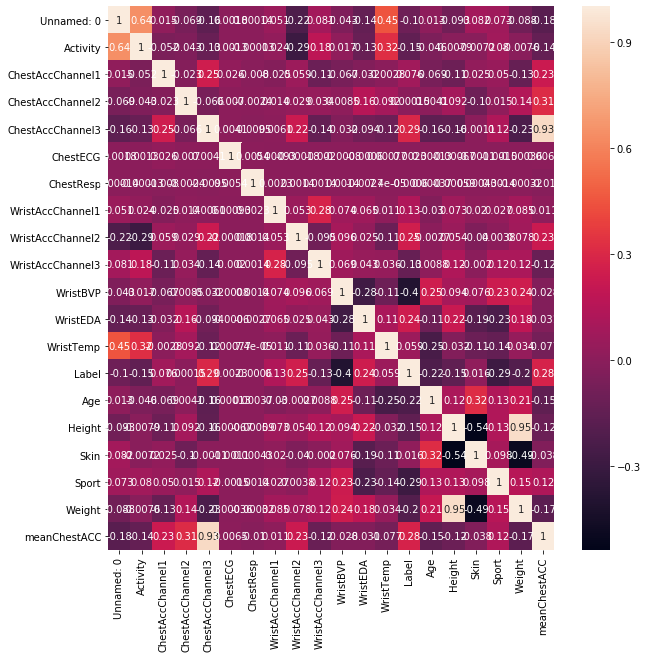

In [65]:
fig, ax = plt.subplots(figsize=(10,10))   
sn.heatmap(x.corr(), annot=True, ax=ax)

On retrouve peu de correlation entre les datas, mais on a des variables inversement corrélés entre elles, c'est intéressant pour la suite